In [147]:
import pandas as pd#to process data
import numpy as np# to create arrays
import seaborn as sb# for visual representation
import matplotlib as plt 
from sklearn.model_selection import train_test_split# to split data into testing and training data
from sklearn.linear_model import LogisticRegression#model because our data is binary either survived or died
from sklearn.metrics import accuracy_score# for evaluating the modelb

In [148]:
titanic=pd.read_csv('train (1).csv')#loading the dataset from train locally stored.
titanic.head()# printing the first five or any number the last 5 you use tail fuction

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
titanic.shape# to get the number of rows and column

(891, 12)

In [150]:
titanic.info()# to get information about a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
titanic.isnull().sum# returns a boolean of each row for each column

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

In [152]:
titanic.isnull().sum()#to get an interger sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
titanic.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [154]:
titanic.drop(columns='Cabin', inplace=True, axis=1)

In [155]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [156]:
titanic.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [157]:
##to find if duplicates exists
titanic.duplicated().sum()

0

In [158]:
pd.Series([34,45,67,781,23])

0     34
1     45
2     67
3    781
4     23
dtype: int64

In [159]:
#handling the missing value in age
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [160]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [161]:
#in embark column we find the value that is repeated most number of times
print(titanic['Embarked'].mode())
print(titanic['Embarked'].mode()[0])


0    S
dtype: object
S


In [162]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [163]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA Analysis

In [164]:
titanic.describe()# only gets the descriptive statistic of a dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
#people who died and survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualisation 

In [166]:
sb.set()#to give theme 

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

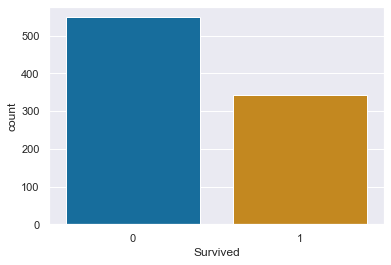

In [167]:
sb.countplot('Survived',data=titanic,palette='colorblind')
#sb.countplot()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

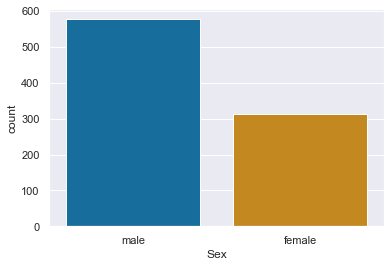

In [168]:
sb.countplot('Sex',data=titanic,palette='colorblind')
titanic['Sex'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

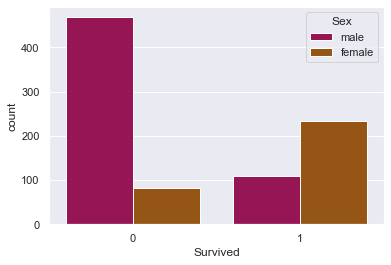

In [169]:
sb.countplot('Survived', hue='Sex', data=titanic, palette='brg')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

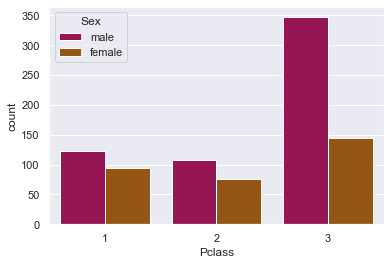

In [170]:
sb.countplot('Pclass', hue='Sex', data=titanic, palette='brg')

In [171]:
#replacing characters  male and female with numerals (encoding)
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [172]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [173]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [174]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating Feature from Target
Survive is our Target column

In [175]:
x=titanic.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
y=titanic['Survived']


In [176]:
#splitting the data into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=40)

In [177]:
x_train.shape,x.shape,x_test.shape

((712, 7), (891, 7), (179, 7))

In [178]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [179]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Model Training

In [180]:
#model training using logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)#this line of code trains the model

LogisticRegression()

Model Evaluation

In [181]:
#This uses the accuracy score
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 

In [182]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('the accuracy of the model is:', training_data_accuracy)

the accuracy of the model is: 0.8061797752808989


In [183]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1]


In [184]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('the accuracy of the model is:', test_data_accuracy)

the accuracy of the model is: 0.8156424581005587


In [187]:
#creating a pickle file with serialization
import pickle 
pickle_out=open('model.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()


In [188]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [191]:
model.predict([[3,0,23,1,0,7,0]])

array([0], dtype=int64)